In [20]:
import numpy as np
import torch
from torchvision import datasets, transforms

# Load MNIST data using torchvision
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_train = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
mnist_test = datasets.MNIST(root="./data", train=False, transform=transform)

# Convert to numpy arrays
train_images = mnist_train.data.numpy().reshape((60000, 28 * 28)).astype('float32') / 255
train_labels = torch.zeros(60000, 10).scatter_(1, mnist_train.targets.unsqueeze(1), 1).numpy()
test_images = mnist_test.data.numpy().reshape((10000, 28 * 28)).astype('float32') / 255
test_labels = torch.zeros(10000, 10).scatter_(1, mnist_test.targets.unsqueeze(1), 1).numpy()


In [21]:
input_dim = 784
hidden_dim1 = 300
output_dim = 10

# Initialize weights
W1 = np.random.randn(input_dim, hidden_dim1)
b1 = np.zeros((1, hidden_dim1))

W2 = np.random.randn(hidden_dim1, output_dim)
b2 = np.zeros((1, output_dim))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)


In [22]:
learning_rate = 0.01
epochs = 30
batch_size = 32
test_errors = []

for epoch in range(epochs):
    # Shuffle data
    permutation = np.random.permutation(train_images.shape[0])
    train_images_shuffled = train_images[permutation]
    train_labels_shuffled = train_labels[permutation]

    for i in range(0, train_images.shape[0], batch_size):
        # Forward pass
        X_batch = train_images_shuffled[i:i+batch_size]
        y_batch = train_labels_shuffled[i:i+batch_size]

        z1 = X_batch.dot(W1) + b1
        a1 = sigmoid(z1)

        z2 = a1.dot(W2) + b2
        y_pred = softmax(z2)

        # Loss
        loss = -np.sum(y_batch * np.log(y_pred)) / batch_size

        # Backward pass
        dZ2 = y_pred - y_batch
        dW2 = a1.T.dot(dZ2)
        db2 = np.sum(dZ2, axis=0)

        dA1 = dZ2.dot(W2.T)
        dZ1 = dA1 * sigmoid_prime(z1)
        dW1 = X_batch.T.dot(dZ1)
        db1 = np.sum(dZ1, axis=0)

        # Update weights
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2

    # Evaluate on test data after each epoch
    z1_test = test_images.dot(W1) + b1
    a1_test = sigmoid(z1_test)
    z2_test = a1_test.dot(W2) + b2
    y_test_pred = softmax(z2_test)

    test_error = 1 - np.mean(np.argmax(y_test_pred, axis=1) == np.argmax(test_labels, axis=1))
    test_errors.append(test_error)

    print(f'Epoch {epoch+1}/{epochs} - Test Error: {test_error*100:.2f}%')

print(f"Final Test Error: {test_errors[-1]*100:.2f}%")


Epoch 1/30 - Test Error: 9.70%
Epoch 2/30 - Test Error: 8.92%
Epoch 3/30 - Test Error: 6.98%
Epoch 4/30 - Test Error: 6.82%
Epoch 5/30 - Test Error: 6.30%
Epoch 6/30 - Test Error: 6.30%
Epoch 7/30 - Test Error: 5.54%
Epoch 8/30 - Test Error: 5.54%
Epoch 9/30 - Test Error: 5.23%
Epoch 10/30 - Test Error: 5.49%
Epoch 11/30 - Test Error: 5.54%
Epoch 12/30 - Test Error: 5.24%
Epoch 13/30 - Test Error: 5.10%
Epoch 14/30 - Test Error: 4.74%
Epoch 15/30 - Test Error: 4.74%
Epoch 16/30 - Test Error: 5.00%
Epoch 17/30 - Test Error: 4.71%
Epoch 18/30 - Test Error: 4.65%
Epoch 19/30 - Test Error: 4.63%
Epoch 20/30 - Test Error: 4.85%
Epoch 21/30 - Test Error: 4.56%
Epoch 22/30 - Test Error: 4.63%
Epoch 23/30 - Test Error: 4.60%
Epoch 24/30 - Test Error: 4.50%
Epoch 25/30 - Test Error: 4.64%
Epoch 26/30 - Test Error: 4.68%
Epoch 27/30 - Test Error: 4.57%
Epoch 28/30 - Test Error: 4.54%
Epoch 29/30 - Test Error: 4.47%
Epoch 30/30 - Test Error: 4.54%
Final Test Error: 4.54%


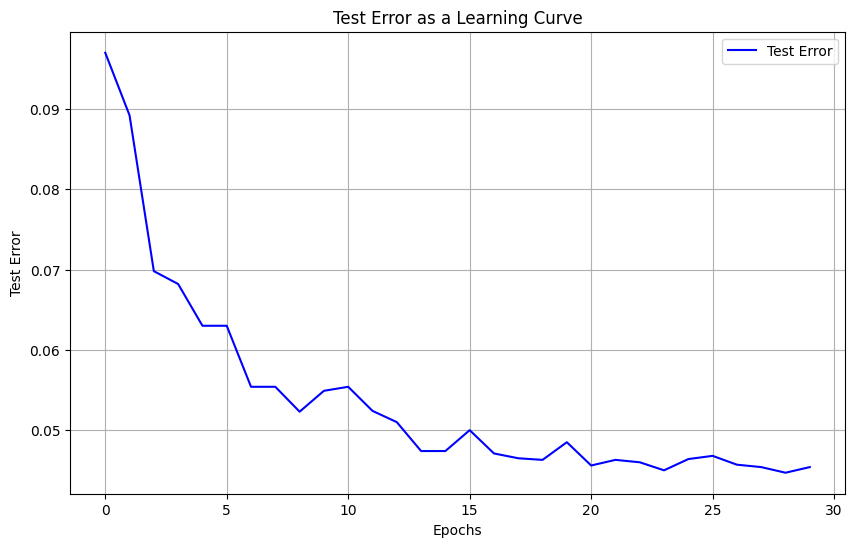

In [23]:
import matplotlib.pyplot as plt

# Plotting the test error for each epoch
plt.figure(figsize=(10,6))
plt.plot(range(epochs), test_errors, label='Test Error', color='blue')
plt.title('Test Error as a Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Test Error')
plt.legend()
plt.grid(True)
plt.show()
